In [9]:
import numpy as np

A = np.array([[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]]) # 4x4 NumPy array
print(A) # Print matrix

Eval, Evec = np.linalg.eig(A) # Calculate eigenvalues and eigenvectors
print(Eval) # Print eigenvalues
print(Evec) # Print eigenvectors

[[1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]]
[ 1. -1.  1.  1.]
[[ 0.          0.          1.          0.        ]
 [ 0.70710678  0.70710678  0.          0.        ]
 [ 0.          0.          0.          1.        ]
 [ 0.70710678 -0.70710678  0.          0.        ]]


In [10]:
print(Evec[:, 1])  # Print the second eigenvector
print(Eval[1])  # Print the second eigenvector

[ 0.          0.70710678  0.         -0.70710678]
-1.0


In [11]:
# Initializing a 2-qubit system in the obtained eigenvector

In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

# Define the statevector
desired_state = Statevector([0, 0.70710678, 0, -0.70710678])

# Create a quantum circuit
qc = QuantumCircuit(3,2)

# Initialize the quantum circuit to the statevector
qc.initialize(desired_state, [0, 1])  # Apply the statevector to qubits 0 and 1

# Draw the circuit (optional)
print(qc)

Traceback (most recent call last):
  Cell In[3], line 13
    qc.initialize(desired_state, [0, 1])  # Apply the statevector to qubits 0 and 1
  File /opt/conda/lib/python3.10/site-packages/qiskit/extensions/quantum_initializer/initializer.py:194 in initialize
    return self.append(Initialize(params, num_qubits, normalize), qubits)
  File /opt/conda/lib/python3.10/site-packages/qiskit/extensions/quantum_initializer/initializer.py:58 in __init__
    self._stateprep = StatePreparation(params, num_qubits, normalize=normalize)
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/library/data_preparation/state_preparation.py:107 in __init__
    raise QiskitError(f"Sum of amplitudes-squared is not 1, but {norm}.")
QiskitError: 'Sum of amplitudes-squared is not 1, but 0.9999999983219684.'

Use %tb to get the full traceback.


In [4]:
# In this case, our statevector is not normalized. So we need to normalize it

In [39]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

# Define the statevector
desired_state = [0, 0.70710678, 0, -0.70710678]  # Unnormalized statevector

# Calculate the normalization factor
norm_factor = sum(abs(c)**2 for c in desired_state) ** 0.5

# Normalize the statevector
normalized_state = [c / norm_factor for c in desired_state]

# Create a quantum circuit
qc = QuantumCircuit(3,2)

# Initialize the quantum circuit to the normalized statevector
qc.initialize(Statevector(normalized_state), [0, 1])  # Apply the normalized state to qubits 0 and 1

# Draw the circuit (optional)
print(qc)


     ┌───────────────────────────────────┐
q_0: ┤0                                  ├
     │  Initialize(0,0.70711,0,-0.70711) │
q_1: ┤1                                  ├
     └───────────────────────────────────┘
q_2: ─────────────────────────────────────
                                          
c: 2/═════════════════════════════════════
                                          


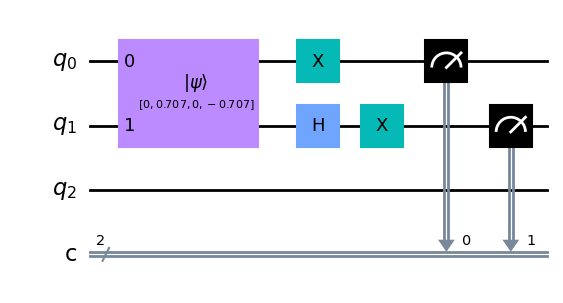

In [40]:
# Perform some operations on the initialized qubits
# The initialized state is |-1>
qc.x(0)
qc.h(1)
qc.x(1)

# The output should be |00> when measured
for n in range(2):
    qc.measure(n,n)
qc.draw()

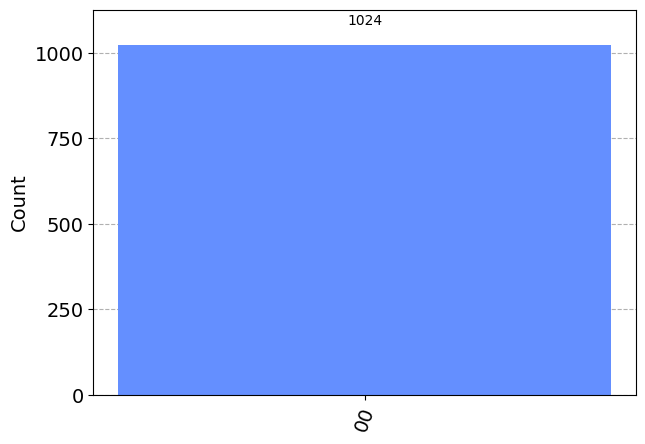

In [41]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
results = aer_sim.run(t_qc, shots=1024).result()
answer = results.get_counts()

plot_histogram(answer)

In [1]:
# Let us find eigenvalues and eigenvectors of some unitaries

In [5]:
import numpy as np

A = (1 / np.sqrt(2)) * np.array([[1, 1j], [1j, 1]])
print(A) # Print matrix

Eval, Evec = np.linalg.eig(A) # Calculate eigenvalues and eigenvectors
print(Eval) # Print eigenvalues
print(Evec) # Print eigenvectors


[[0.70710678+0.j         0.        +0.70710678j]
 [0.        +0.70710678j 0.70710678+0.j        ]]
[0.70710678+0.70710678j 0.70710678-0.70710678j]
[[ 0.70710678+0.00000000e+00j  0.70710678+0.00000000e+00j]
 [ 0.70710678+0.00000000e+00j -0.70710678-2.77555756e-16j]]


In [1]:
import numpy as np

A = (1 / np.sqrt(3)) * np.array([[1, 1 + 1j], [1 - 1j, -1]])
print(A) # Print matrix

Eval, Evec = np.linalg.eig(A) # Calculate eigenvalues and eigenvectors
print(Eval) # Print eigenvalues
print(Evec) # Print eigenvectors


[[ 0.57735027+0.j          0.57735027+0.57735027j]
 [ 0.57735027-0.57735027j -0.57735027+0.j        ]]
[ 1.-4.53246652e-17j -1.+4.53246652e-17j]
[[ 0.88807383+0.j         -0.32505758-0.32505758j]
 [ 0.32505758-0.32505758j  0.88807383+0.j        ]]
